In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, shuffle=False)

In [ ]:
X_train.iloc[:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.iloc[-1]

'6'

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, shuffle=False)

In [ ]:
X_6_indices=np.where(y_train=='6')
X_9_indices=np.where(y_train=='9')
x_pos=X_train[X_6_indices]
x_neg=X_train[X_9_indices]
X_train_69=np.vstack((x_pos,x_neg))
y_train_69 = np.concatenate(([1] * x_pos.shape[0], [0] * x_neg.shape[0]))

In [ ]:
X_6_indices_test=np.where(y_test=='6')
X_9_indices_test=np.where(y_test=='9')
x_pos_test=X_test[X_6_indices_test]
x_neg_test=X_test[X_9_indices_test]
X_test_69=np.vstack((x_pos_test,x_neg_test))
y_test_69 = np.concatenate(([1] * x_pos_test.shape[0], [0] * x_neg_test.shape[0]))

In [ ]:
shuffle(X_train_69,y_train_69, random_state=1729)
shuffle(X_test_69,y_test_69, random_state=1729)

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 1, ..., 1, 0, 1])]

In [ ]:
print(y_train_69.sum())
print(y_test_69.sum())

4855
2021


In [ ]:
X_train_69_Tf = StandardScaler().fit_transform(X_train_69)
X_train_69_Tf.shape

(9746, 784)

In [ ]:
print(X_train_69_Tf[0].mean())
np.mean(X_train_69_Tf[0])

-0.000744022399868564


-0.000744022399868564

In [ ]:
print(X_train_69_Tf[0].mean(), X_train_69_Tf[0].std())
print(X_train_69_Tf[:, 0].mean(), X_train_69_Tf[:, 0].std())

-0.000744022399868564 0.6061952080607138
0.0 0.0


In [ ]:
sgd_class = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')
loss1=[]
for i in range(10):
  sgd_class.fit(X_train_69, y_train_69)
  y_pred_69 = sgd_class.predict(X_train_69)
  loss1.append(log_loss(y_train_69, y_pred_69))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

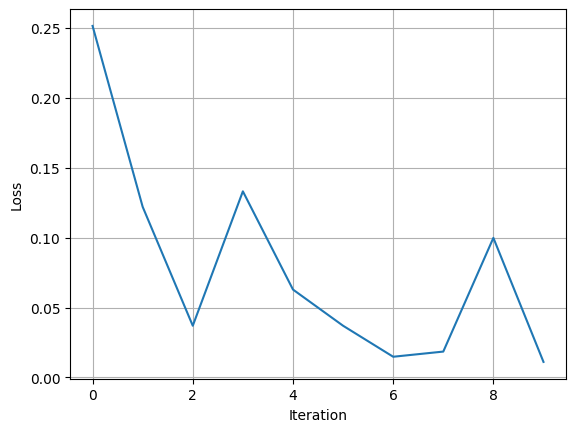

In [ ]:
plt.figure()
plt.plot(np.arange(10), loss1)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_class = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.000001, warm_start=True, learning_rate='constant')
loss2=[]
for i in range(10):
  sgd_class.fit(X_train_69, y_train_69)
  y_pred_69 = sgd_class.predict(X_train_69)
  loss2.append(log_loss(y_train_69, y_pred_69))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

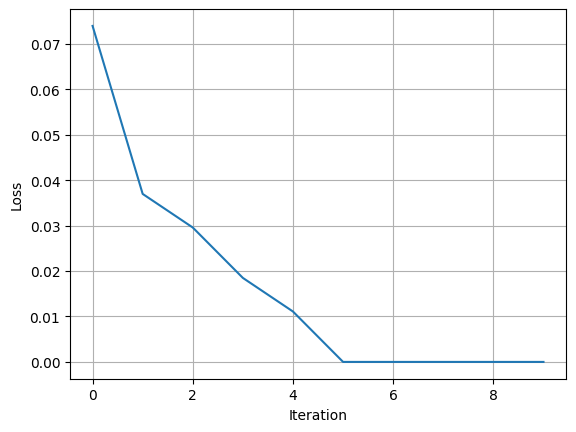

In [ ]:
plt.figure()
plt.plot(np.arange(10), loss2)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_class = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')
sscaler = StandardScaler()
pipe1 = Pipeline(steps=[('sscaler',sscaler), ('sgd',sgd_class)])
loss3=[]
for i in range(10):
  pipe1.fit(X_train_69, y_train_69)
  y_pred_69 = pipe1.predict(X_train_69)
  loss3.append(log_loss(y_train_69, y_pred_69))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

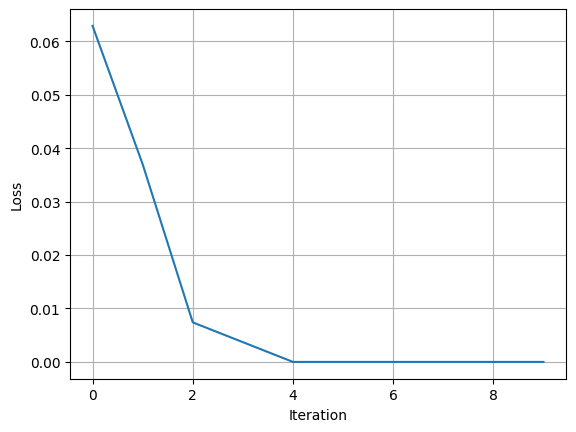

In [ ]:
plt.figure()
plt.plot(np.arange(10), loss3)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_class = SGDClassifier(loss='log', penalty='l2', alpha=0, eta0=0.01, random_state=10, max_iter=1, warm_start=True, learning_rate='invscaling', power_t=1)
loss4=[]
for i in range(10):
  sgd_class.fit(X_train_69, y_train_69)
  y_pred_69 = sgd_class.predict(X_train_69)
  loss4.append(log_loss(y_train_69, y_pred_69))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

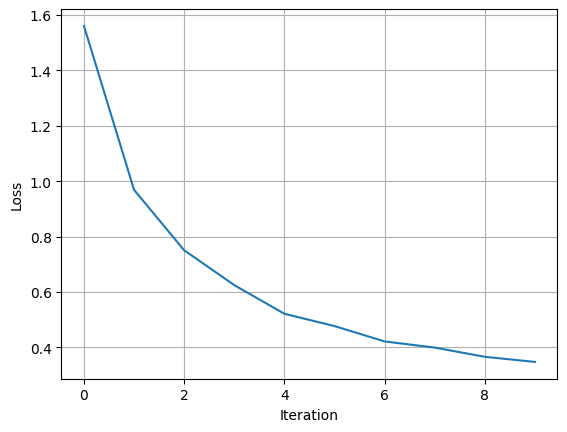

In [ ]:
plt.figure()
plt.plot(np.arange(10), loss4)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## GA

In [ ]:
sgd_new = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.01, learning_rate='constant', warm_start=True)
loss5=[]
for i in range(30):
  sgd_new.fit(X_train_69, y_train_69)
  y_pred = sgd_new.predict(X_train_69)
  loss5.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

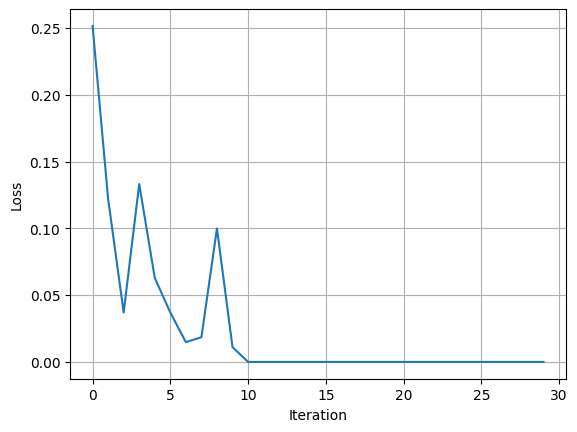

In [ ]:
plt.figure()
plt.plot(np.arange(30), loss5)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_new = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.000001, learning_rate='constant', warm_start=True)
loss6=[]
for i in range(30):
  sgd_new.fit(X_train_69, y_train_69)
  y_pred = sgd_new.predict(X_train_69)
  loss6.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

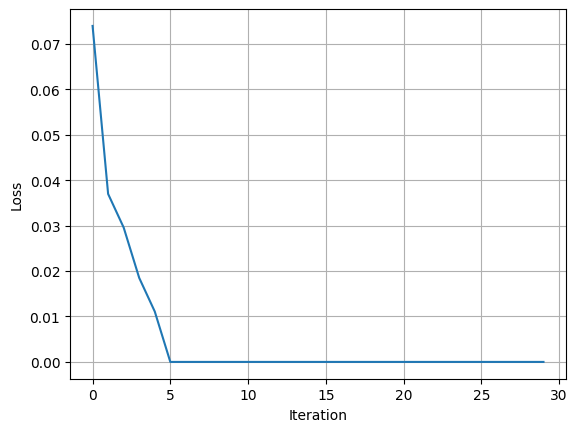

In [ ]:
plt.figure()
plt.plot(np.arange(30), loss6)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_new = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, max_iter=1, eta0=0.01, learning_rate='constant', warm_start=True)
sscaler=StandardScaler()
pipe_new = Pipeline(steps=[('sscaler',sscaler), ('sgd',sgd_new)])
loss7=[]
for i in range(30):
  pipe_new.fit(X_train_69, y_train_69)
  y_pred = pipe_new.predict(X_train_69)
  loss7.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

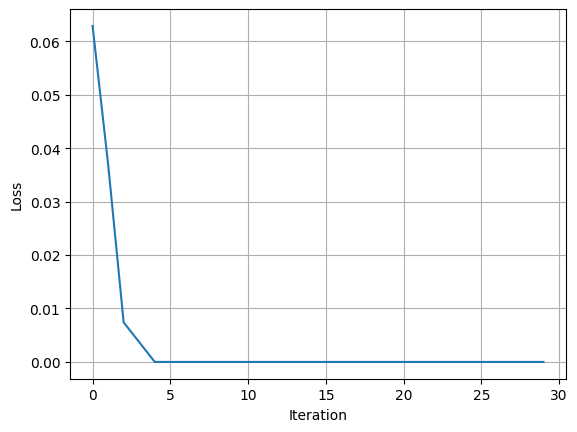

In [ ]:
plt.figure()
plt.plot(np.arange(30), loss7)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_new = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, eta0=0.1, max_iter=1, power_t=1, learning_rate='invscaling', warm_start=True)
loss8=[]
for i in range(30):
  sgd_new.fit(X_train_69, y_train_69)
  y_pred = sgd_new.predict(X_train_69)
  loss8.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

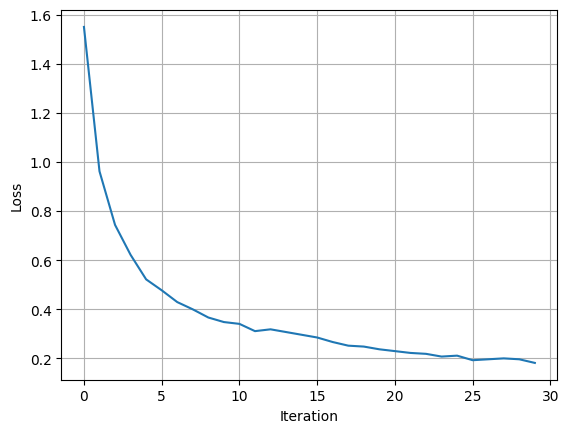

In [ ]:
plt.figure()
plt.plot(np.arange(30), loss8)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
sgd_new = SGDClassifier(loss='log', penalty='l2', alpha=0, random_state=10, eta0=0.5, max_iter=1, power_t=0.5, shuffle=True, learning_rate='invscaling', warm_start=True)
loss9=[]
for i in range(10):
  sgd_new.fit(X_train_69, y_train_69)
  y_pred = sgd_new.predict(X_train_69)
  loss9.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

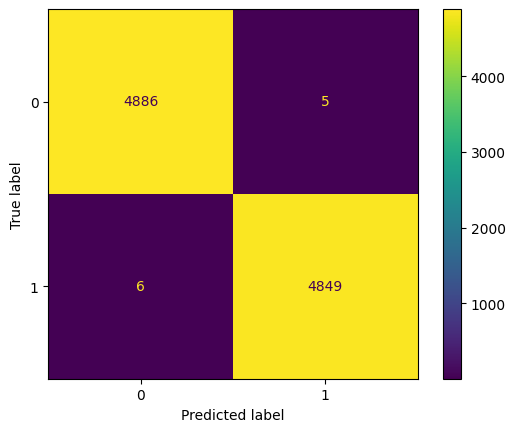

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_train_69, y_pred)

In [ ]:
news_data= fetch_20newsgroups()

In [ ]:
tfid = TfidfVectorizer()
tfid.fit_transform(news_data.data).shape

(11314, 130107)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(news_data.data, news_data.target, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
mnb = MultinomialNB()
pipe2 = Pipeline(steps=[('tfid', tfid), ('mnb', mnb)])
pipe2.fit(X_train,y_train)
pipe2.score(X_train,y_train)

0.9307993433514332

In [ ]:
pipe2.score(X_test,y_test)

0.8273932253313696

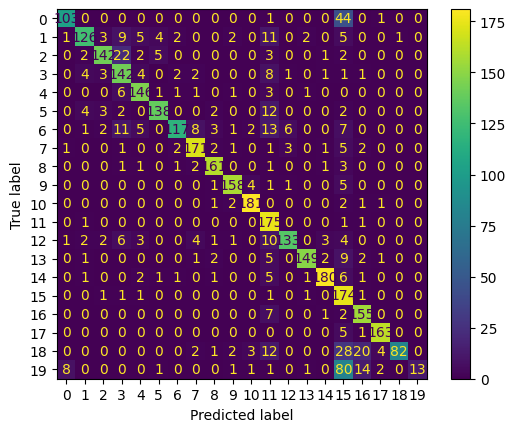

In [ ]:
y_pred_test = pipe2.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)